In [9]:
from imutils import face_utils
import numpy as np
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import face_recognition
import os
from imutils import paths
import pickle

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

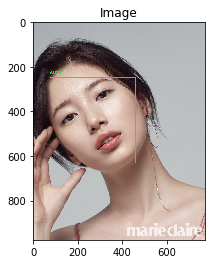

In [3]:
data = pickle.loads(open("known.bin", "rb").read())
 
image = cv2.imread("download31.jpg")

boxes = face_recognition.face_locations(image)
encodings = face_recognition.face_encodings(image, boxes)
 
names = []
for encoding in encodings:
    matches = face_recognition.compare_faces(data["encodings"], encoding)
    name = "Unknown"
    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {} 
        for i in matchedIdxs:
            name = data["names"][i]
            counts[name] = counts.get(name, 0) + 1 
        name = max(counts, key=counts.get)
    names.append(name)                             
for ((top, right, bottom, left), name) in zip(boxes, names):
    cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
    y = top - 15 if top - 15 > 15 else top + 15
    cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
 
imshow("Image", image)

In [4]:
names

['suzy']

In [5]:
names[0]

'suzy'

In [11]:
def faceverification(model, file):
    data = pickle.loads(open(model, "rb").read())

    image = cv2.imread(file)

    boxes = face_recognition.face_locations(image)
    encodings = face_recognition.face_encodings(image, boxes)

    names = []
    for encoding in encodings:
        matches = face_recognition.compare_faces(data["encodings"], encoding)
        name = "Unknown"
        if True in matches:
            matchedIdxs = [i for (i, b) in enumerate(matches) if b]
            counts = {} 
            for i in matchedIdxs:
                name = data["names"][i]
                counts[name] = counts.get(name, 0) + 1 
            name = max(counts, key=counts.get)
        names.append(name)                             
    for ((top, right, bottom, left), name) in zip(boxes, names):
        cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 2)
        y = top - 15 if top - 15 > 15 else top + 15
        cv2.putText(image, name, (left, y), cv2.FONT_HERSHEY_SIMPLEX,  0.75, (0, 255, 0), 2)
    return names

In [12]:
faceverification('known.bin','download31.jpg')

['suzy']